# Capstone
Project : PGPDSE-FT Mumbai Jun19

Group : G3

Domain : Insurance

The Challenge: 

In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

Proposed Solution: 

Combination of Neural Network and Ensemble Modelling
- Input Layer: Binned input variables.
- Hidden Layer 1: 6 Decision Tree Classifiers, 6 Random Forest Classifiers, and 6 XG Boost Classifiers.
- Hidden Layer 2: KNN model is used to combine the outputs of the Decision Trees, another KNN model is used to combine the outputs of the Random Forest, and one more KNN model is used to combine the outputs of the XG Boost.
- Output Layer: XGB model is used to combine the outputs of the above XGB models.

Problem Statement

In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

By developing a predictive model that accurately classifies rirted tosk using a more automated approach, you can greatly impact public perception of the industry.

The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling us to significantly streamline the process.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [2]:
insurance_df = pd.read_csv('DATA.csv')

In [3]:
insurance_df.shape

(59381, 128)

In [4]:
insurance_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


# **************Data pre-processing*****************

## We will find the column that is not numerical

In [5]:
# Find the diffrent datatypes available in datasource

columns_df=pd.DataFrame({'column_names':insurance_df.columns,'datatypes':insurance_df.dtypes},index=None)
x=columns_df.groupby(by=['datatypes']).count()
x.reset_index(inplace=True)
x.rename(columns={"column_names":"Number_of_columns"},inplace=True)
lst=[]
for data_type in x.datatypes:
    v=list(insurance_df.select_dtypes(include=data_type).columns)
    lst.append(v)
    x['Column_Names']=pd.Series(lst)
x

,datatypes,Number_of_columns,Column_Names
0,int64,109,"[Id, Product_Info_1, Product_Info_3, Product_I..."
1,float64,18,"[Product_Info_4, Ins_Age, Ht, Wt, BMI, Employm..."
2,object,1,[Product_Info_2]


# So we will have to convert Product_Info_2 from Categorical to Numeric

In [6]:
# Find unique values of the column
insurance_df.Product_Info_2.unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [7]:
def map_productinfo2(Product_Info_2):
    if Product_Info_2 == 'A1':
        return 1
    elif Product_Info_2 == 'A2':
        return 2
    elif Product_Info_2 == 'A3':
        return 3
    elif Product_Info_2 == 'A4':
        return 4
    elif Product_Info_2 == 'A5':
        return 5
    elif Product_Info_2 == 'A6':
        return 6
    elif Product_Info_2 == 'A7':
        return 7
    elif Product_Info_2 == 'A8':
        return 8
    elif Product_Info_2 == 'B1':
        return 9
    elif Product_Info_2 == 'B2':
        return 10
    elif Product_Info_2 == 'C1':
        return 11
    elif Product_Info_2 == 'C2':
        return 12
    elif Product_Info_2 == 'C3':
        return 13
    elif Product_Info_2 == 'C4':
        return 14
    elif Product_Info_2 == 'D1':
        return 15
    elif Product_Info_2 == 'D2':
        return 16
    elif Product_Info_2 == 'D3':
        return 17
    elif Product_Info_2 == 'D4':
        return 18
    else:
        return 19
insurance_df['Product_Info_2'] = insurance_df['Product_Info_2'].apply(map_productinfo2)

# Missing value analysis

,features,missing_count,missing_count_percentage
0,Employment_Info_1,19,0.031997
1,Employment_Info_4,6779,11.416110
2,Employment_Info_6,10854,18.278574
3,Insurance_History_5,25396,42.767889
4,Family_Hist_2,28656,48.257860
5,Family_Hist_3,34241,57.663226
6,Family_Hist_4,19184,32.306630
7,Family_Hist_5,41811,70.411411
8,Medical_History_1,8889,14.969435
9,Medical_History_10,58824,99.061990


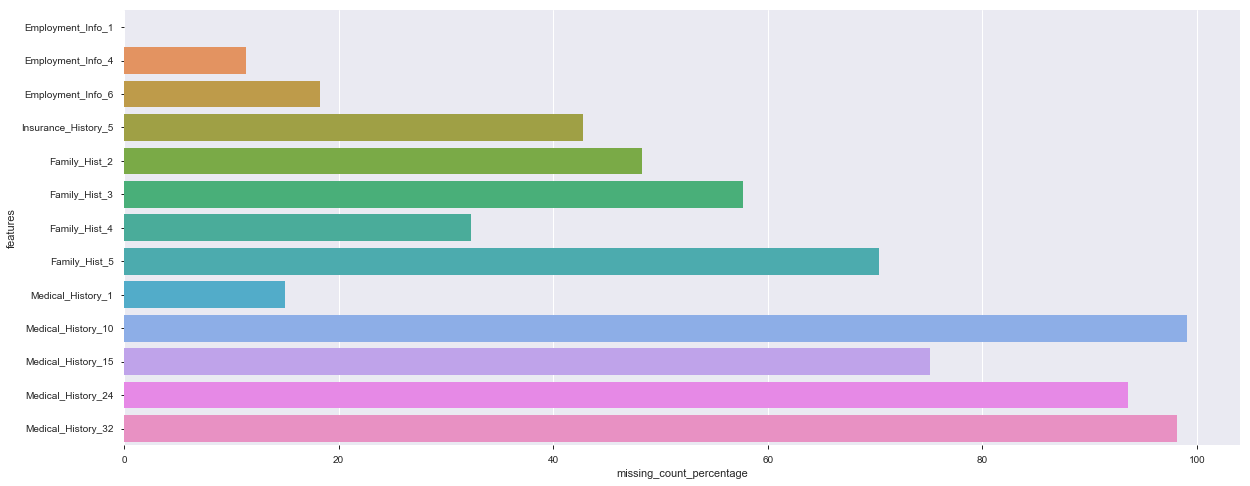

In [8]:
#Exploring missing values
insurance_df_missing= insurance_df.isnull().sum()[insurance_df.isnull().sum() !=0]
insurance_df_missing=pd.DataFrame(insurance_df_missing.reset_index())
insurance_df_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
insurance_df_missing['missing_count_percentage']=((insurance_df_missing['missing_count'])/59381)*100
plt.figure(figsize=(20,8))
sns.barplot(y=insurance_df_missing['features'],x=insurance_df_missing['missing_count_percentage'])
insurance_df_missing

As we can see from the graphs, most of the values in Medical_History_10, Medical_History_24 and Medical_History_32 are missing hence we drop them

In [9]:
#dropping columns containing missing values more than 80%
insurance_df = insurance_df.drop(['Medical_History_10','Medical_History_24','Medical_History_32'], axis=1)

In [10]:
#Mean Imputation for continous variables
Continuos = ['Employment_Info_1','Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
                    'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']
insurance_df[Continuos] = insurance_df[Continuos].fillna(insurance_df[Continuos].mean())

In [11]:
#Mode Imputation for categorical variables
Categorical = ['Medical_History_1', 'Medical_History_15']
insurance_df[Categorical] = insurance_df[Categorical].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [12]:
# Check Missing values again
insurance_df_missing= insurance_df.isnull().sum()[insurance_df.isnull().sum() !=0]
insurance_df_missing=pd.DataFrame(insurance_df_missing.reset_index())
insurance_df_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
insurance_df_missing['missing_count_percentage']=((insurance_df_missing['missing_count'])/59381)*100
insurance_df_missing

,features,missing_count,missing_count_percentage


## Now we do not have any missing values

In [13]:
# Generating comprehensive report of the data set
pp.ProfileReport(insurance_df)

Number of variables,125
Number of observations,59381
Total Missing (%),0.0%
Total size in memory,56.6 MiB
Average record size in memory,1000.0 B
Numeric,59
Categorical,0
Boolean,63
Date,0
Text (Unique),0
Rejected,3


Numerical Attributes : 59
    
Boolean Attributes : 63
    
Rejected Attributes (due to high correlation with other attributes) : 3
    
Total Attributes left = 125

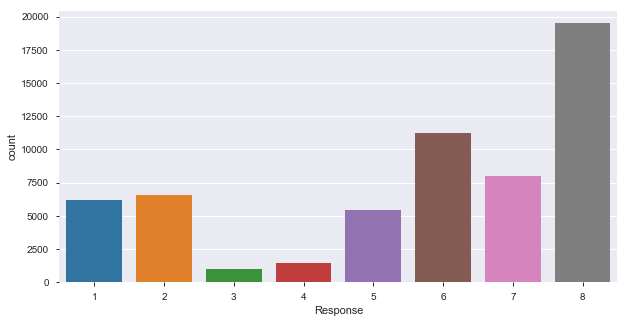

In [13]:
#Identify number of classes of Response variable
aixs1 = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='Response',data=insurance_df)

Observations from Target variable

Majority of data is for Response=8 , followed by 6,7,2
Lowest data is for Response=3,followed by 4
Response = 1,2,5 show almost same distribution of data

Target variable is "Response" and it has 8 classes - out of 8 data seems to be skewed towards class 8

In [18]:
X = train_data.drop(['Id', 'Response'], axis=1)
y= train_data['Response']

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
print(model.feature_importances_)

[0.00380193 0.02653411 0.00682477 0.0332437  0.00130077 0.01042404
 0.00278431 0.03050392 0.02678329 0.0519998  0.06605229 0.02573342
 0.01849463 0.00692686 0.01535532 0.00644289 0.02526076 0.00944336
 0.0020266  0.02281858 0.00882192 0.00263586 0.01304363 0.00329646
 0.00793748 0.0039043  0.00490378 0.00935228 0.01568495 0.00694769
 0.00967173 0.00578908 0.01318655 0.02105317 0.02061494 0.02441579
 0.017745   0.02424874 0.02478813 0.00667718 0.0236592  0.00244778
 0.00309788 0.00327645 0.00681548 0.01179311 0.00117837 0.00489727
 0.0066165  0.00281436 0.03073478 0.00816037 0.00287281 0.00522708
 0.00326107 0.0024648  0.00690151 0.00231432 0.02237603 0.0073217
 0.00708196 0.00164307 0.005407   0.01139327 0.00581642 0.001449
 0.00487547 0.01039836 0.00034208 0.00812585 0.0047924  0.00067671
 0.00825366 0.00314806 0.01267048 0.00325118 0.00110897 0.00750947
 0.00196528 0.00130058 0.00157445 0.00182897 0.00102406 0.00117539
 0.00353467 0.00475455 0.00117638 0.00090552 0.0009835  0.0144265

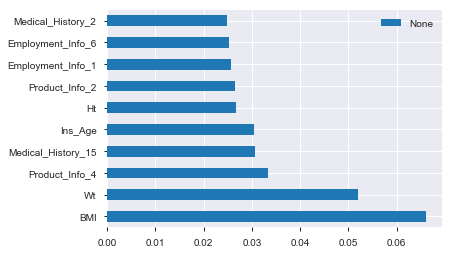

In [23]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',legend=True)
plt.show()


# Modelling

## Model 1 - Apply Decision Tree Classifier

In [16]:
#Dataset split
#We will train our model more than testing so we will select test size as 15 % of total data

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(insurance_df, test_size = 0.15)
print(train_data.shape)
print(test_data.shape)

(50473, 125)
(8908, 125)


In [17]:
x_train = train_data.drop(['Id', 'Response'], axis=1)
y_train = train_data['Response']
X_test = test_data.drop(['Id', 'Response'], axis=1)
Y_test = test_data['Response']

In [17]:
y_train.unique()

array([8, 6, 1, 7, 5, 2, 3, 4], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

In [19]:
# Using a Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':range(1,20,2)}
DT=DecisionTreeClassifier()
clf_DT=GridSearchCV(DT,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(x_train,y_train)
y_pred=clf_DT.predict(X_test)
print("Accuracy score using Decision Tree Classifier : ",accuracy_score(Y_test,y_pred))

Accuracy score using Decision Tree Classifier :  0.5565783565334531


## Model 2 - Apply Random Forest Tree Classifier

In [20]:
#Using a Random Forest tree classifier
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth':range(1,20,2)}
RF=RandomForestClassifier()
clf_rf=GridSearchCV(RF,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(x_train,y_train)
y_pred=clf_rf.predict(X_test)
print("Accuracy score using Random Forest Tree Classifier : ",accuracy_score(Y_test,y_pred))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score using Random Forest Tree Classifier :  0.544005388414908


## For now we can use Decision tree and try to improve upon accuracy

As we can see that the target column has 8 classes we will cluster them into 2 classes 0 and 1 and see if accuracy improves

# Improvement 1 - We will do a binary classification by altering the target variable

Based on the attributes of customers, will the life insurance policy be approved or not i.e.yes(1) or no(0)

As a next step, we will create a new response variable, "Final_Response" in actual dataset

In [21]:
#create a funtion to create a  new target variable based on conditions

def new_target(row):
    if (row['Response']<=7) & (row['Response']>=0):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=-1
    return val

#create a copy of original dataset
insurance_df_new=insurance_df.copy()

#create a new column
insurance_df_new['Final_Response']=insurance_df_new.apply(new_target,axis=1)

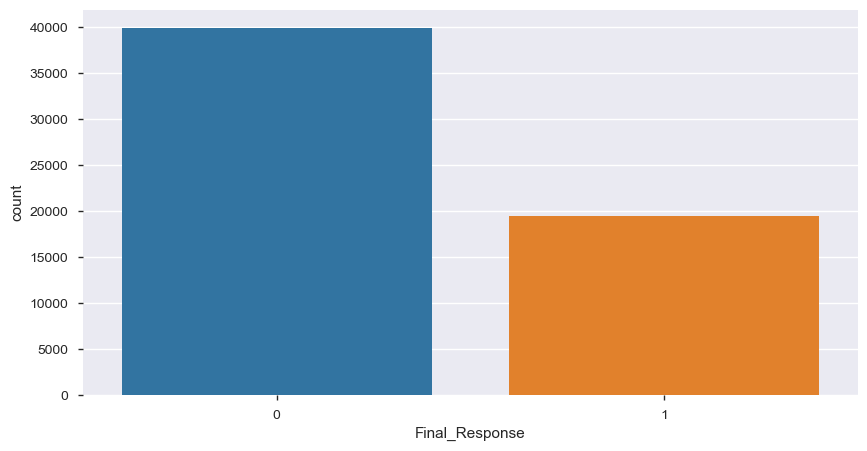

In [22]:
#Again Identify number of classes of Final Response variable
aixs1 = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='Final_Response',data=insurance_df_new)

In [23]:
#drop the actual response column
insurance_df_new.drop(axis=1,labels=['Response'],inplace=True)

#rename the "Final_Response" to "Response"
insurance_df_new.rename(columns={"Final_Response":"Response"},inplace=True)

#replace the newly created dataset in the name of the original dataset
insurance_df=insurance_df_new

# We will now see the performance improvement of both models : Decision Tree Classifier and Random Forest Tree Classifier

So we need to reset our x_train, y_train, X_test and Y_test datasets

In [24]:
#Dataset split
#We will train our model more than testing so we will select test size as 15 % of total data

train_data, test_data = train_test_split(insurance_df, test_size = 0.15)

x_train = train_data.drop(['Id', 'Response'], axis=1)
y_train = train_data['Response']
X_test = test_data.drop(['Id', 'Response'], axis=1)
Y_test = test_data['Response']

In [25]:
# Using a Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':range(1,20,2)}
DT=DecisionTreeClassifier()
clf_DT=GridSearchCV(DT,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(x_train,y_train)
y_pred=clf_DT.predict(X_test)
print("Accuracy score using Decision Tree Classifier : ",accuracy_score(Y_test,y_pred))

Accuracy score using Decision Tree Classifier :  0.8219577907498877


In [26]:
#Using a Random Forest tree classifier
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth':range(1,20,2)}
RF=RandomForestClassifier()
clf_rf=GridSearchCV(RF,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(x_train,y_train)
y_pred=clf_rf.predict(X_test)
print("Accuracy score using Random Forest Tree Classifier : ",accuracy_score(Y_test,y_pred))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score using Random Forest Tree Classifier :  0.8329591378536148


## So we can now see improvement from 52 % to 82 % for both models : Decision Tree Classifier and Random Forest Tree Classifier

Reason: We have clustered the target column "Response" from 8 classes to 2 classes

# ***This motivates us to apply other models and build a comprehensive report on them based on accuracy and F1 score***

# Improvement 2 - We will apply different models and select best model based on accuracy and F1 score

In [27]:
# Import different models

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score

In [28]:
#set seed for same results everytime
seed=0

#declare the models
dt=DecisionTreeClassifier(random_state=seed)
rf=RandomForestClassifier(random_state=seed)
lr=LogisticRegression(random_state=seed)
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gbc=ensemble.GradientBoostingClassifier()
xgb=XGBClassifier(random_state=seed)

#create a list of models
models=[dt,rf,lr,adb,bgc,gbc,xgb]

def score_model(x_train,y_train,X_test,Y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(x_train,y_train)
        y_pred=model.predict(X_test)
        
        #compute metrics
        train_accuracy=model.score(x_train,y_train)
        test_accuracy=model.score(X_test,Y_test)
        
        p_score=metrics.precision_score(Y_test,y_pred)
        r_score=metrics.recall_score(Y_test,y_pred)
        f1_score=metrics.f1_score(Y_test,y_pred)
        fp, tp, th = metrics.roc_curve(Y_test, y_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        df.loc[i,'AUC'] = metrics.auc(fp, tp)
        
        i+=1
    
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)

In [29]:
report_no_null=score_model(x_train,y_train,X_test,Y_test)
report_no_null

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score,AUC
6,XGBClassifier,0.74,0.80,0.84,0.84,0.77,0.830274
3,AdaBoostClassifier,0.72,0.80,0.83,0.83,0.76,0.821692
5,GradientBoostingClassifier,0.74,0.79,0.84,0.84,0.76,0.825637
4,BaggingClassifier,0.76,0.70,0.99,0.83,0.73,0.794259
2,LogisticRegression,0.75,0.70,0.82,0.82,0.72,0.789125
1,RandomForestClassifier,0.77,0.66,0.99,0.82,0.71,0.780595
0,DecisionTreeClassifier,0.68,0.67,1.00,0.78,0.67,0.755951


# Conclusion : AdaBoostClassifier, GradientBoostingClassifier and XGBClassifier give us equivalent accuracy and F1 score

# Improvement 3 - Outlier treatment

Find outliers and remove them

## Since we are working on improving our accuracy on to help insurance company decide on customers eligible for insurance plan or not, so we will check for outliers of customers attributes

In [52]:
# Find IQR for all columns and print them and check for "True" which means that they have outliers
Q1 = insurance_df.quantile(0.25)
Q3 = insurance_df.quantile(0.75)
IQR = Q3 - Q1
# sort List1 in descending order
IQR=IQR.sort_values(axis=0,ascending=False)
print(IQR>0)

Id                      True
Medical_History_2       True
Product_Info_2          True
Medical_History_1       True
InsuredInfo_3           True
Medical_History_41      True
Insurance_History_3     True
Insurance_History_4     True
Insurance_History_7     True
Insurance_History_8     True
InsuredInfo_6           True
Insurance_History_1     True
Insurance_History_9     True
Family_Hist_1           True
Medical_History_4       True
Response                True
Product_Info_4          True
Employment_Info_6       True
Ins_Age                 True
BMI                     True
Wt                      True
Family_Hist_4           True
Ht                      True
Employment_Info_1       True
Family_Hist_2           True
Insurance_History_5     True
Medical_Keyword_39     False
Medical_Keyword_38     False
Medical_Keyword_40     False
Family_Hist_3          False
                       ...  
Medical_Keyword_30     False
Medical_Keyword_31     False
Medical_Keyword_7      False
Medical_Keywor

Below columns have outliers

Id,
Medical_History_2,
Product_Info_2,
Medical_History_1,
InsuredInfo_3,
Medical_History_41,
Insurance_History_3,
Insurance_History_4,
Insurance_History_7,
Insurance_History_8,
InsuredInfo_6,
Insurance_History_1,
Insurance_History_9,
Family_Hist_1,
Medical_History_4,
Response,
Product_Info_4,
Employment_Info_6,
Ins_Age,
BMI,
Wt,
Family_Hist_4,
Ht,
Employment_Info_1,
Family_Hist_2,
Insurance_History_5

Logically we can skip columns ID, Response, Product_Info_2 because they are either serial numbers, target variables or catagories

## So we select Ins_Age, BMI, Ht, Ins_Age for outlier treatment

In [56]:
#function to remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [57]:
dev=remove_outlier(insurance_df,'BMI')
dev=remove_outlier(dev,'Wt')
dev=remove_outlier(dev,'Ins_Age')
insurance_df=remove_outlier(dev,'Ht')

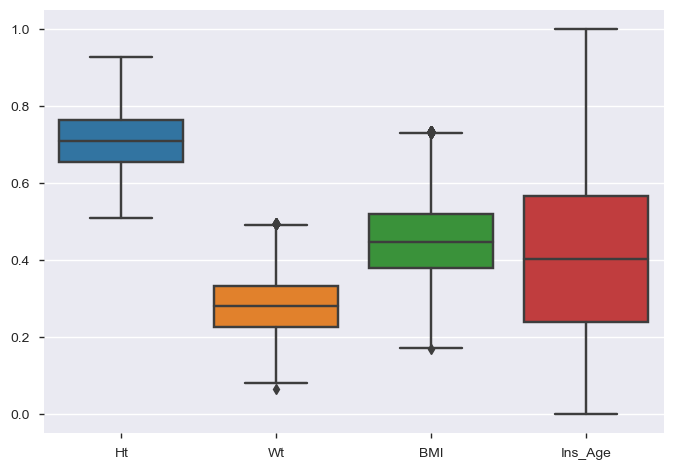

In [58]:
# Verify if outliers are removed
misc_cols=["Ht","Wt","BMI","Ins_Age"]
sns.boxplot(data=insurance_df[misc_cols])

In [59]:
#Dataset split
#We will train our model more than testing so we will select test size as 15 % of total data

train_data, test_data = train_test_split(insurance_df, test_size = 0.15)

x_train = train_data.drop(['Id', 'Response'], axis=1)
y_train = train_data['Response']
X_test = test_data.drop(['Id', 'Response'], axis=1)
Y_test = test_data['Response']

In [60]:
#set seed for same results everytime
seed=0

#declare the models
dt=DecisionTreeClassifier(random_state=seed)
rf=RandomForestClassifier(random_state=seed)
lr=LogisticRegression(random_state=seed)
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gbc=ensemble.GradientBoostingClassifier()
xgb=XGBClassifier(random_state=seed)

#create a list of models
models=[dt,rf,lr,adb,bgc,gbc,xgb]

def score_model(x_train,y_train,X_test,Y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(x_train,y_train)
        y_pred=model.predict(X_test)
        
        #compute metrics
        train_accuracy=model.score(x_train,y_train)
        test_accuracy=model.score(X_test,Y_test)
        
        p_score=metrics.precision_score(Y_test,y_pred)
        r_score=metrics.recall_score(Y_test,y_pred)
        f1_score=metrics.f1_score(Y_test,y_pred)
        fp, tp, th = metrics.roc_curve(Y_test, y_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        df.loc[i,'AUC'] = metrics.auc(fp, tp)
        
        i+=1
    
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)

In [61]:
report_no_null_no_outlier=score_model(x_train,y_train,X_test,Y_test)
report_no_null_no_outlier

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score,AUC
5,GradientBoostingClassifier,0.74,0.79,0.83,0.83,0.76,0.822598
6,XGBClassifier,0.73,0.80,0.83,0.83,0.76,0.823000
3,AdaBoostClassifier,0.71,0.80,0.83,0.82,0.75,0.814801
2,LogisticRegression,0.73,0.70,0.81,0.81,0.72,0.784794
4,BaggingClassifier,0.75,0.69,0.99,0.82,0.72,0.786444
1,RandomForestClassifier,0.75,0.67,0.99,0.81,0.71,0.777859
0,DecisionTreeClassifier,0.67,0.67,1.00,0.77,0.67,0.746437


## Conclusion : We have improved F1 score but the model selection remains between AdaBoostClassifier, GradientBoostingClassifier and XGBClassifier